In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Imoport the adult dataset
df = pd.read_csv(r'C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind-assignments\practice_basic_ml\adult.csv')
df.head() # target variable is 'income'

df['income'].value_counts()

#Convert income to target
df['target'] = [0 if x == '<=50K' else 1 for x in df['income']]

df = df.drop('income', axis=1)

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [60]:
# Separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

In [61]:
# Display the column names
print("Columns in the dataframe:")
print(X.columns)

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Show the first few rows
print("\nFirst few rows of the dataset:")
print(X.head())

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)

# One-hot encode the categorical variables
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

Columns in the dataframe:
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     488

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


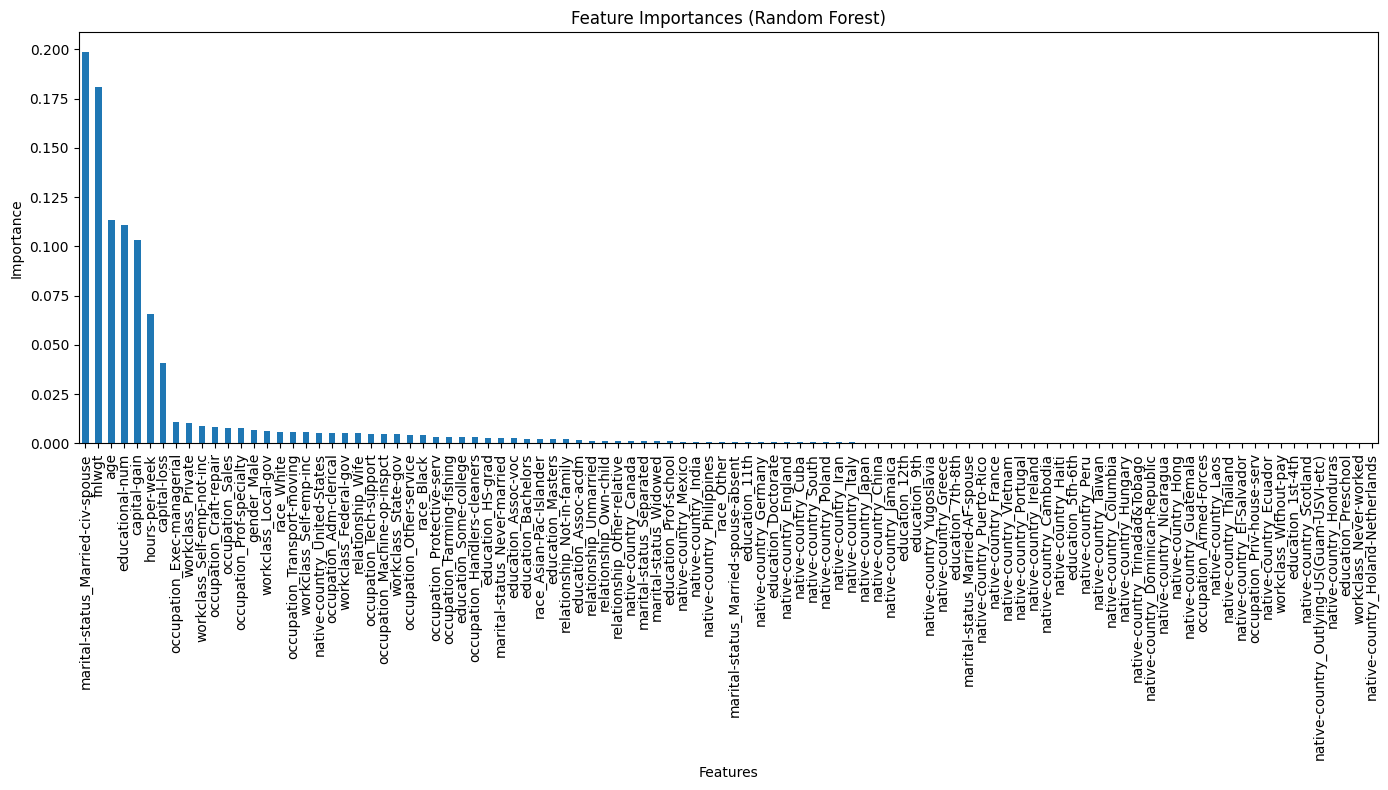


Random Forest Feature Importances:
marital-status_Married-civ-spouse            0.198749
fnlwgt                                       0.180949
age                                          0.113224
educational-num                              0.111146
capital-gain                                 0.103030
                                               ...   
native-country_Outlying-US(Guam-USVI-etc)    0.000025
native-country_Honduras                      0.000009
education_Preschool                          0.000004
workclass_Never-worked                       0.000000
native-country_Holand-Netherlands            0.000000
Length: 100, dtype: float64


In [64]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(14, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

print("\nRandom Forest Feature Importances:")
print(feature_importances)